# This notebook is prepared by ApplAi's Technical And Training Depratment.
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


###

### Task 1: Importing libraries and Exploring the Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("Mall_Customers.csv")

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project

In [2]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape


(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

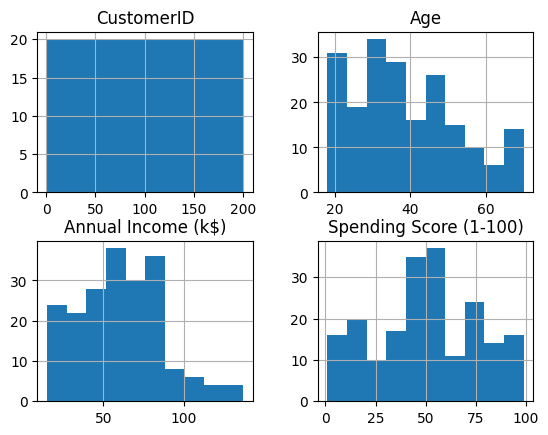

In [7]:
df.hist()

### Task 4: creat a model that fits the data

In [8]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<Axes: >

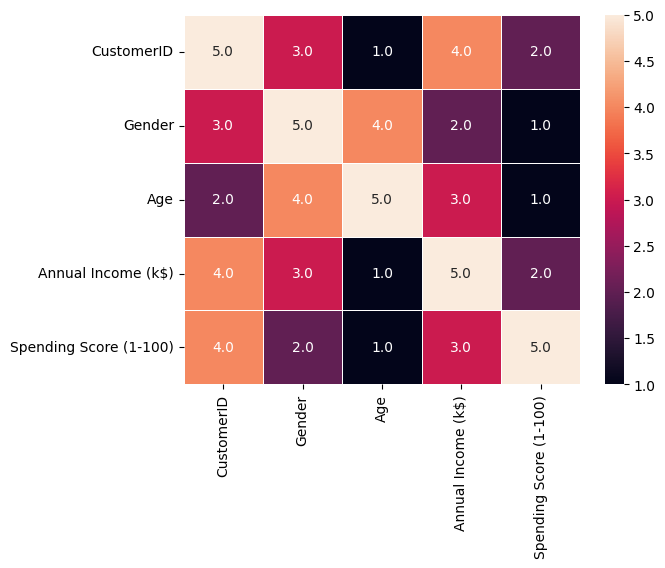

In [9]:
import seaborn as sns
cor=df.corr()
sns.heatmap(cor.rank(axis="columns"),annot=True,fmt=".1f",linewidths=.5)

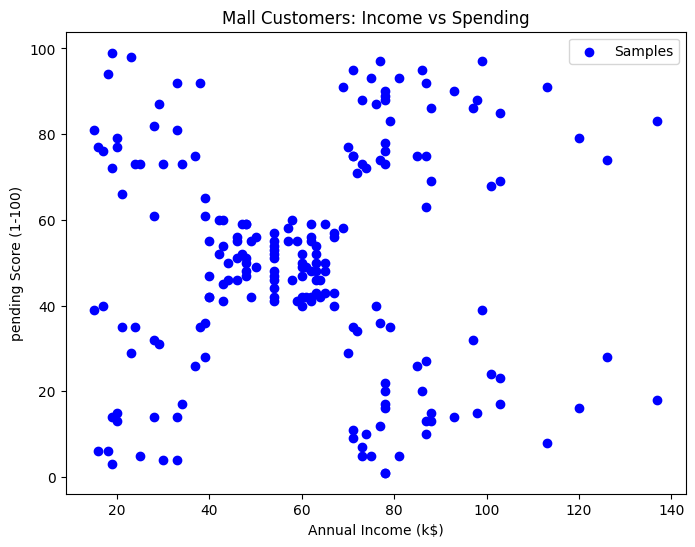

In [10]:
X = df.iloc[:, [-2, -1]].to_numpy()
# Plot the dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c='blue', label='Samples')
plt.xlabel('Annual Income (k$)')
plt.ylabel('pending Score (1-100)')
plt.title('Mall Customers: Income vs Spending')
plt.legend()
plt.show()



In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Elbow Method

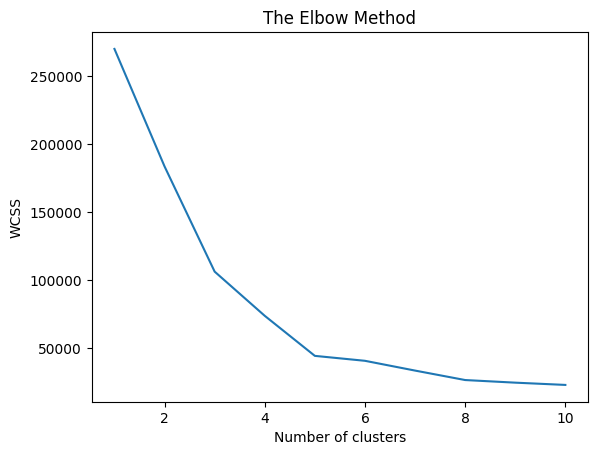

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Use k-means to predict size clusters
k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print('Cluster labels:', y_kmeans)

Cluster labels: [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


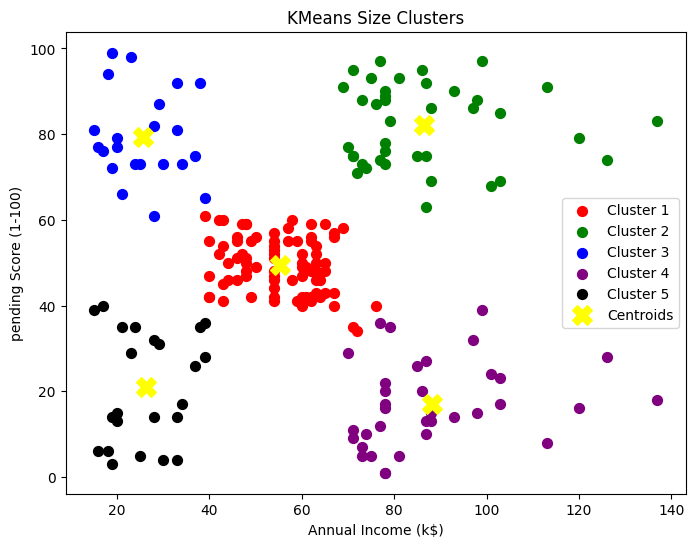

In [15]:
# Visualize Size clusters
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue','purple','black']
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('pending Score (1-100)')
plt.title('KMeans Size Clusters')
plt.legend()
plt.show()

DBSCAN Cluster labels: [ 0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  1  0  1  2  1  2  1  0  1  2  1  2  1  2  1  2  1  0  1
  2  1  0  1  2  1  2  1  2  1  2  1  2  1  2  1  0  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1 -1  1  2 -1  2  1  2 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


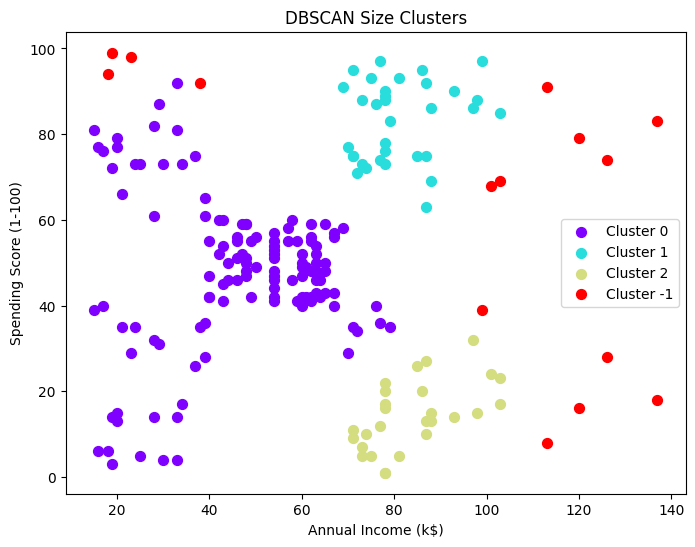

In [16]:
# Use DBSCAN to predict size clusters with eps=8, min_samples=4
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=10, min_samples=4)
y_dbscan = dbscan.fit_predict(X)
print('DBSCAN Cluster labels:', y_dbscan)

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
unique_labels = set(y_dbscan)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    plt.scatter(X[y_dbscan == label, 0], X[y_dbscan == label, 1], s=50, c=[color], label=f'Cluster {label}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Size Clusters')
plt.legend()
plt.show()

### Task 5: creating an accurecy table

In [17]:
from sklearn.metrics import silhouette_score

# KMeans Silhouette
sil_k = silhouette_score(X, y_kmeans)

# DBSCAN Silhouette
sil_d = silhouette_score(X, y_dbscan)

print("KMeans Silhouette Score :", sil_k)
print("DBSCAN Silhouette Score :", sil_d)


KMeans Silhouette Score : 0.553931997444648
DBSCAN Silhouette Score : 0.39889488555584734


 Conclusion

Based on the Silhouette Scores obtained for each model:

KMeans Silhouette Score = 0.5539

DBSCAN Silhouette Score = 0.3888

The KMeans algorithm clearly performed better, because it achieved a higher silhouette value (closer to 1).
This means that the clusters produced by KMeans are more compact and better separated compared to the clusters created by DBSCAN on this dataset.

 Interpretation:

The customers grouped with KMeans are more homogeneous inside each cluster and more different from customers in other clusters.

DBSCAN was still able to form clusters, but the quality of those clusters is lower in comparison.

Therefore, for this specific dataset (Annual Income vs Spending Score), KMeans is the more suitable clustering algorithm.

In [18]:
# Train and Save 
import pickle
from sklearn.cluster import KMeans, DBSCAN

# Train
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
dbscan = DBSCAN(eps=8, min_samples=4).fit(X)

# Save each
pickle.dump(kmeans, open("kmeans_model.pkl", "wb"))
pickle.dump(dbscan, open("dbscan_model.pkl", "wb"))

